In [40]:
import h5py
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import shap
import lightgbm as lgb 

In [29]:
# read data
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[-1]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('train')
test  = load_data('test')

print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

X = train[all_variables]
y = train['Truth']

print (f'Shape of X: {X.shape}')
print (f'Shape of y: {y.shape}')

train

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)
Shape of X: (162500, 160)
Shape of y: (162500,)


,eventNumber,runNumber,actualInteractionsPerCrossing,averageInteractionsPerCrossing,correctedActualMu,correctedAverageMu,correctedScaledActualMu,correctedScaledAverageMu,NvtxReco,p_nTracks,...,p_E5x7_Lr1,p_E5x7_Lr2,p_E5x7_Lr3,p_E7x11_Lr0,p_E7x11_Lr1,p_E7x11_Lr2,p_E7x11_Lr3,p_E7x7_Lr0,p_E7x7_Lr1,index
0,87834187.0,300000.0,26.500000,26.500000,26.500000,26.500000,26.500000,26.500000,18.0,3.0,...,43402.332031,74045.820312,337.980713,273.708801,43091.683594,74447.539062,470.177124,273.708801,43091.683594,0.0
1,84862668.0,300000.0,35.500000,35.500000,35.500000,35.500000,35.500000,35.500000,23.0,4.0,...,36774.925781,58228.847656,412.321869,10861.282227,37433.324219,61805.964844,460.203613,10861.282227,37433.324219,1.0
2,20869557.0,300000.0,29.490000,29.490000,29.490000,29.490000,29.490000,29.490000,20.0,3.0,...,23413.427734,38875.042969,3492.513672,5705.863281,23728.701172,40497.234375,3333.052734,5705.863281,23728.701172,2.0
3,42161877.0,300000.0,37.500000,37.500000,37.500000,37.500000,37.500000,37.500000,17.0,2.0,...,27372.955078,104002.000000,921.178040,0.000000,27101.673828,106995.789062,1127.115356,0.000000,27101.673828,3.0
4,82761614.0,300000.0,59.500000,59.500000,59.500000,59.500000,59.500000,59.500000,33.0,7.0,...,45745.859375,87924.406250,-75.167221,0.000000,45947.109375,93710.968750,-188.182098,0.000000,45947.109375,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162495,87753440.0,300000.0,59.500000,59.500000,59.500000,59.500000,59.500000,59.500000,34.0,2.0,...,35473.875000,86889.070312,867.511475,1120.453857,36521.750000,88872.992188,748.347656,1120.453857,36521.750000,162495.0
162496,7746045.0,300000.0,11.490000,11.490000,11.490000,11.490000,11.490000,11.490000,10.0,4.0,...,36722.617188,79933.289062,352.093262,0.000000,36812.964844,83049.414062,665.589417,0.000000,36800.929688,162496.0
162497,85994391.0,300000.0,44.490002,44.490002,44.490002,44.490002,44.490002,44.490002,28.0,5.0,...,26506.359375,52808.492188,287.444580,7824.405273,26847.457031,53551.433594,-13.175649,7824.405273,26847.457031,162497.0
162498,9886827.0,300000.0,20.490000,20.490000,20.490000,20.490000,20.490000,20.490000,14.0,1.0,...,46398.742188,134187.593750,1426.328613,0.000000,46656.253906,137266.218750,1512.928101,0.000000,46656.253906,162498.0


Basic decision tree accuracy is: 0.9058153846153846


Permutation explainer: 32501it [23:18, 23.07it/s]                           


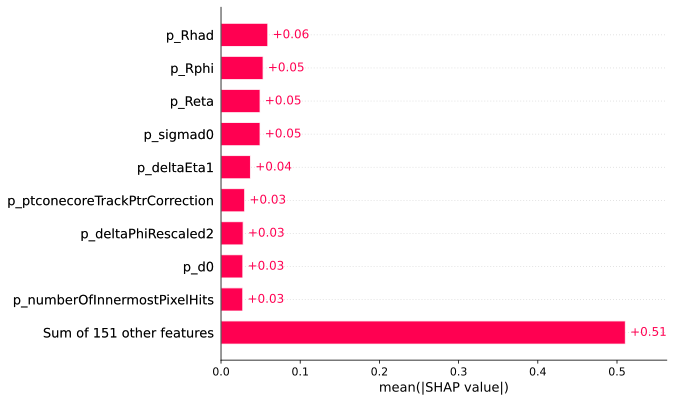

In [30]:
# choose the maximum 20 variables

# split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# decision tree
class decision_tree:

    clf = DecisionTreeClassifier()

    model = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f'Basic decision tree accuracy is: {accuracy}')

explainer = shap.Explainer(decision_tree.model.predict, X_test)
# explainer = shap.Explainer(decision_tree.model)
# shap_values = explainer(X_train)
shap_values = explainer(X_test)
# print(shap_values)
shap.plots.bar(shap_values)


In [33]:
feature_names = shap_values.feature_names
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
vals = np.abs(shap_df.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)

shap_importance.head(20)

,col_name,feature_importance_vals
50,p_Rhad,0.059044
46,p_Rphi,0.053118
45,p_Reta,0.049290
15,p_sigmad0,0.049268
52,p_deltaEta1,0.037184
129,p_ptconecoreTrackPtrCorrection,0.029820
53,p_deltaPhiRescaled2,0.027944
14,p_d0,0.027531
56,p_numberOfInnermostPixelHits,0.027439
78,p_ambiguityType,0.022502


In [85]:
shape_variables = ['p_Rhad', 'p_Rphi', 'p_Reta', 'p_sigmad0', 'p_deltaEta1', 'p_ptconecoreTrackPtrCorrection', 'p_deltaPhiRescaled2', 'p_d0', 'p_numberOfInnermostPixelHits', 'p_ambiguityType',
                    'p_rawPhiCluster','p_phiCalo', 'p_ethad', 'p_EptRatio', 'p_Rhad1', 'p_E7x11_Lr3', 'p_ehad1', 'p_Eratio', 'p_deltaPhi2', 'p_nTracks']
print(np.shape(shape_variables))
new_X = train[shape_variables]

X_train1, X_test1, y_train1, y_test1 = train_test_split(new_X, y, test_size=0.25, random_state=42)

clf = DecisionTreeClassifier()

model = clf.fit(X_train1, y_train1)

y_pred1 = clf.predict(X_test1)

accuracy = accuracy_score(y_test1, y_pred1)

print(f'Basic decision tree accuracy is: {accuracy}')

(20,)
Basic decision tree accuracy is: 0.9098830769230769


In [102]:

# lgb_train = lgb.Dataset(X_train1, y_train1)
# lgb_eval  = lgb.Dataset(X_test1,  y_test1, reference=lgb_train)

data_train = lgb.Dataset(X_train1, label=y_train1)
valid_data = lgb.Dataset(X_test1, label=y_test1)

params = {  'objective': 'binary',
          'boosting_type': 'gbdt',
          'max_depth': 10,
          'min_child_weight':3.14,
          'scale_pos_weight':10.43,
          'bagging_freq':1,
          'bagging_fraction':0.6,
          'verbosity': -1,
          'min_data': 10,
}

lgb_clf = lgb.train(params,
                train_set=data_train,
                num_boost_round=1000,
                valid_sets=valid_data)

y_pred2 = np.around(lgb_clf.predict(X_test1))
acc = accuracy_score(y_pred2, y_test1)
print(f"Train accuracy: {acc*100.0:.2f}%")

# # Make predictions:
# y_score = lgb_clf.predict(X_test1, num_iteration=lgb_clf.best_iteration)
# y_pred  = [1 if pred > 0.5 else 0 for pred in y_score]



[1]	valid_0's binary_logloss: 0.502892
[2]	valid_0's binary_logloss: 0.459167
[3]	valid_0's binary_logloss: 0.425214
[4]	valid_0's binary_logloss: 0.39784
[5]	valid_0's binary_logloss: 0.37463
[6]	valid_0's binary_logloss: 0.355586
[7]	valid_0's binary_logloss: 0.338941
[8]	valid_0's binary_logloss: 0.324569
[9]	valid_0's binary_logloss: 0.312557
[10]	valid_0's binary_logloss: 0.302677
[11]	valid_0's binary_logloss: 0.293681
[12]	valid_0's binary_logloss: 0.28665
[13]	valid_0's binary_logloss: 0.280177
[14]	valid_0's binary_logloss: 0.274818
[15]	valid_0's binary_logloss: 0.27021
[16]	valid_0's binary_logloss: 0.266205
[17]	valid_0's binary_logloss: 0.262657
[18]	valid_0's binary_logloss: 0.25996
[19]	valid_0's binary_logloss: 0.257712
[20]	valid_0's binary_logloss: 0.255971
[21]	valid_0's binary_logloss: 0.254012
[22]	valid_0's binary_logloss: 0.252356
[23]	valid_0's binary_logloss: 0.250826
[24]	valid_0's binary_logloss: 0.249811
[25]	valid_0's binary_logloss: 0.248801
[26]	valid_0's

In [95]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

fpr, tpr, _ = roc_curve(y_test1, y_score) 
auc_score = auc(fpr,tpr)   
auc_score

0.9752709019053412